In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pprint import pprint
import tqdm

from scipy.stats import chi2_contingency

In [2]:
from rdkit import Chem

## Read data

In [3]:
data_active = pd.read_csv("data/mu_actives_Ki_IC50_human_and_rat_interaction_fingerprints_5c1m.csv")
data_inactive = pd.read_csv("data/mu_inactives_Ki_IC50_human_and_rat_interaction_fingerprints_5c1m.csv")

data = pd.concat((data_active, data_inactive))
data = data.loc[:, data.columns.map(lambda x: x[0]=='A')]
y = np.array([1]*len(data_active) + [0]*len(data_inactive))

/home/wwydmanski/.conda/envs/drug-design/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2745,2754,2775,2776,2777,2778,2779,2781,2782,2788,2789,2790) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/wwydmanski/.conda/envs/drug-design/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2740,2746,2755,2778,2779,2780,2781,2782,2784,2785,2790,2791,2792,2793) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
selected = pd.read_csv("significant_cols.csv").values[:, 0]
data = data.loc[:, selected]

## Preprocess 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Train!

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def test_model(model, X_test, y_test):
    y_hat = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_hat, y_test):.3f}")
    print(f"Precision: {precision_score(y_hat, y_test):.3f}")
    print(f"Recall: {recall_score(y_hat, y_test):.3f}")    
    print(f"F1: {f1_score(y_hat, y_test):.3f}")    

### XGBoost
For a simple baseline

In [10]:
from xgboost import XGBClassifier

In [11]:
clf = XGBClassifier(max_depth=10, n_estimators=500, eta=0.2)
clf.fit(X_train, y_train);

/home/wwydmanski/.conda/envs/drug-design/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
test_model(clf, X_test, y_test)

Accuracy: 0.762
Precision: 0.802
Recall: 0.772
F1: 0.787


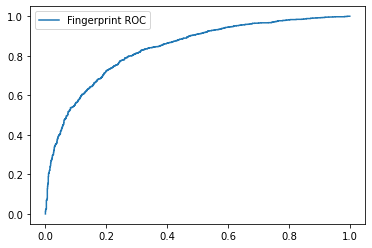

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test[:], clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Fingerprint ROC")

# fpr, tpr, thresholds = roc_curve(y_test[:, 1], model.proba(X_test)[:, 1])
# plt.plot(fpr, tpr, label="Agonist/antagonist")
plt.legend()
# plt.title("XGBoost ROC")

In [1626]:
optimizer.calculate_step([original_smiles], 1)

(array(['C1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        'c1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        '11cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        '(1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        '-1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        '21cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        's1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        'N1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        '=1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        ')1cc(O)ccc1C[C@H]([NH3+])C(=O)N2CCC[C@H]2C(=O)N[C@@H](CCc3ccccc3)C(=O)N4CCC[C@H]4C(=O)N',
        'n